### Introduction | Aim | Objective
- The goal is to classify objects (1 of 10) correctly 
- It's CIFAR-10 dataset and the model will identify features like shapes, clours, edges, textures, etc.)
- Each Input image is 32x32 pixels with RBB colours
- The Convolutional layers will help identify the features in the form of patterns within the images
- The Pooling layers helps to reduce spartial dimensions of the images by keeping the useful ones and discarding the useless ones
- The Flatten layers helps to convert 2D structures to 1D vectors
- The Softmax Classification (with Softmax Activation Function) outputs a vector of probabilities by converting raw scores into ptobalities
- The model makes prediction by chosing the output class with the highest probability 
    

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3087 - loss: 1.8312 - val_accuracy: 0.4904 - val_loss: 1.4649
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5169 - loss: 1.3417 - val_accuracy: 0.5952 - val_loss: 1.1486
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5672 - loss: 1.2208 - val_accuracy: 0.6187 - val_loss: 1.0918
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5948 - loss: 1.1459 - val_accuracy: 0.6505 - val_loss: 1.0095
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6179 - loss: 1.0784 - val_accuracy: 0.6495 - val_loss: 0.9962
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6357 - loss: 1.0308 - val_accuracy: 0.6393 - val_loss: 1.0400
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6384 - loss: 1.0183 - val_accuracy: 0.6874 - val_loss: 0.9095
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6553 -

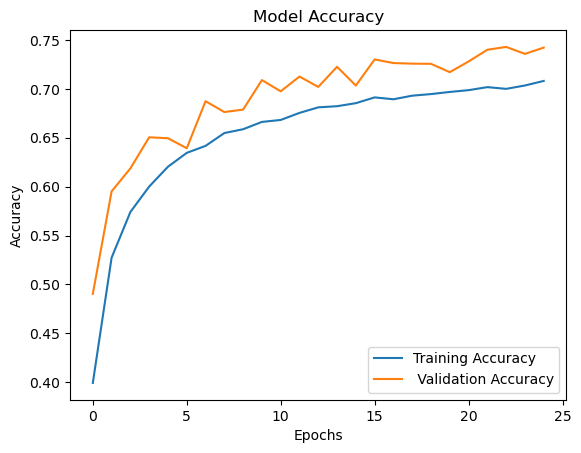

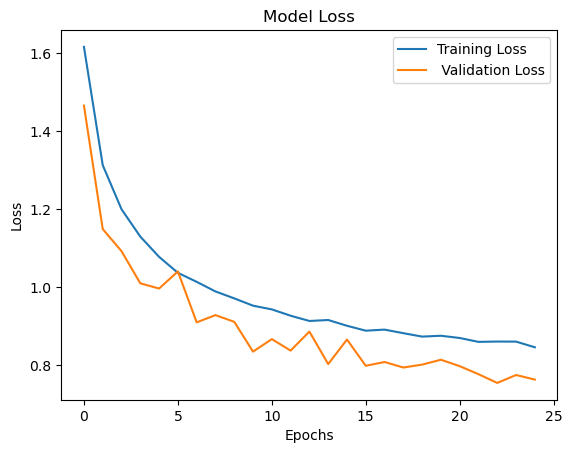

In [2]:
# Import the necessary libraries
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the image pixel values to the range 0-1
train_images, test_images = train_images/255.0, test_images/255.0 # pixel values (0-255), scale images >> (0, 1) to improve performance 

# Define the CNN model
pic_model = models.Sequential([
    
    # First Convolutional layer
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3,3), activation="relu"), 
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),
    
    # Third Convolutional Layer
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Dropout(0.25),
    
    # The Fourth Convolutional Layer
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.25),
    
    # The Flatten Layer
    layers.Flatten(),
    layers.Dropout(0.25),
    
    # The Fully Connected Layer
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    
    # The Output Layer
    layers.Dense(10, activation="softmax") # CIFAR-10 with 10 output classes

])
                  
# Compile the model
pic_model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = pic_model.fit(train_images, train_labels, epochs=25, validation_data=(test_images,test_labels))

# Evaluate the model
test_loss, test_acc = pic_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy:{test_acc}")

def plot_accuracy_and_loss(history):
    epochs = range(1, len(history.history['loss']) + 1)
    
        # Plot the Accuracy
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label=" Validation Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot the loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label=" Validation Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.show()

# Plot the loss and accuracy
plot_accuracy_and_loss(history)

# Save model
pic_model.save("pic_model.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


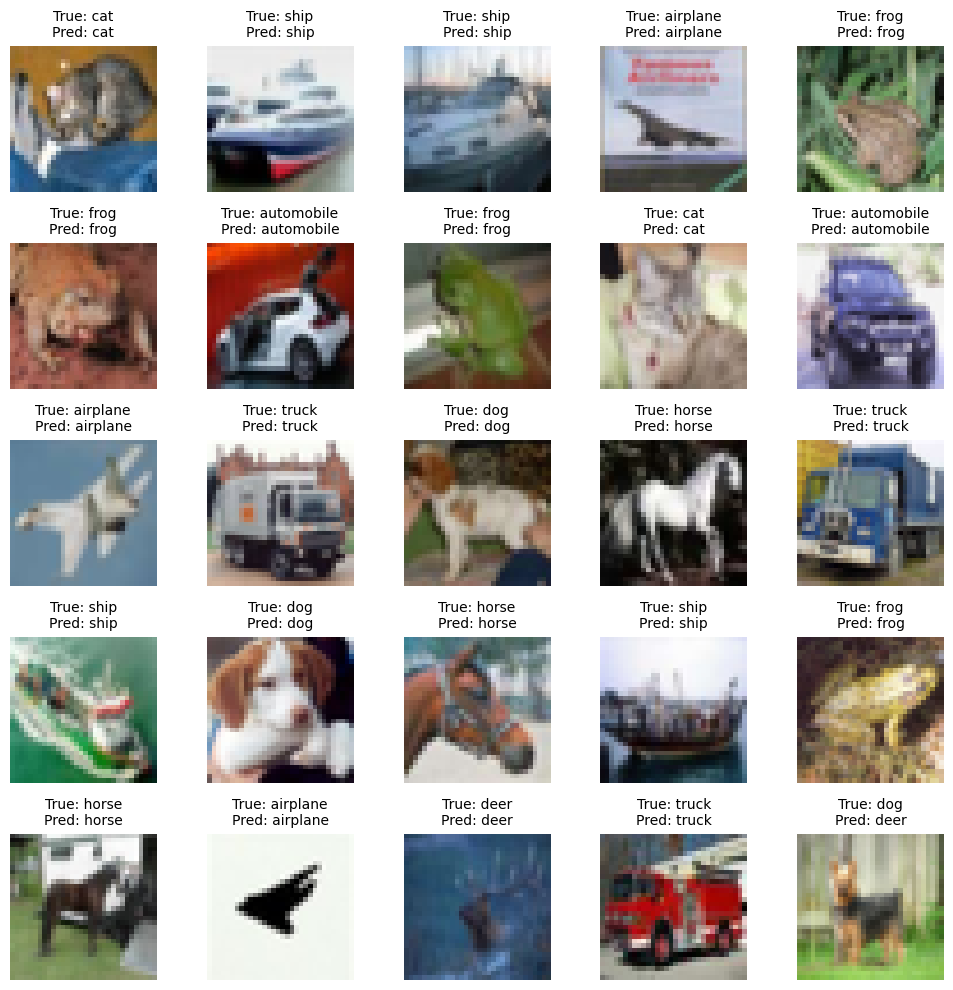

In [3]:
# Import required library
import numpy as np

# Function to plot the predicted images
def plot_images(images, labels, predictions, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.axis("off")
        true_label = class_names[labels[i][0]]
        predicted_label = class_names[predictions[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.tight_layout()
    plt.show()

# Make predictions on the test data
predictions = pic_model.predict(test_images)

# Get the index of the predicted class for each image
predicted_class_indices = np.argmax(predictions, axis=1)

# Class names for CIFAR-10
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Plot images with predictions
plot_images(test_images, test_labels, predicted_class_indices, class_names)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1000
           1       0.93      0.83      0.88      1000
           2       0.68      0.59      0.63      1000
           3       0.61      0.56      0.58      1000
           4       0.70      0.67      0.68      1000
           5       0.67      0.64      0.65      1000
           6       0.64      0.90      0.75      1000
           7       0.81      0.75      0.78      1000
           8       0.77      0.91      0.84      1000
           9       0.87      0.80      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



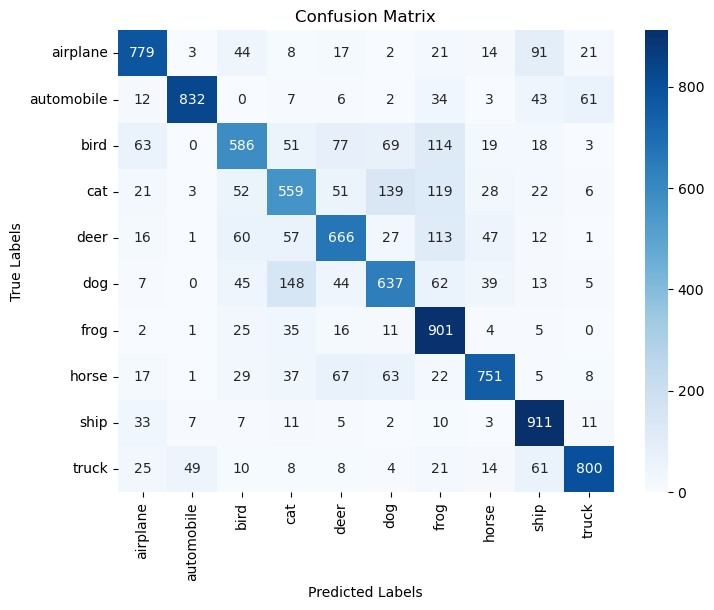

In [4]:
# Print classification report
report = classification_report(test_labels, predicted_class_indices)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_class_indices)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()